In [ ]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

data = pd.read_excel("/content/UoW Data 2024_25.xlsx", sheet_name=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Timestamp                                                                     132 non-null    object
 1   Ethnicity                                                                     115 non-null    object
 2   Nationality                                                                   112 non-null    object
 3   No Of Dependents / Children                                                   100 non-null    object
 4   Shoe Size (UK) 
Please enter a UK shoe size.                                  195 non-null    object
 5   What are the shoes needed for?                                                114 non-null    object
 6   Employment Status                         

Missing values per column:
 Timestamp                                                                        72
Ethnicity                                                                        89
Nationality                                                                      92
No Of Dependents / Children                                                     104
Shoe Size (UK) \nPlease enter a UK shoe size.                                     9
What are the shoes needed for?                                                   90
Employment Status                                                                61
Do you receive Universal Credit?                                                 90
Are you in education or training?                                                90
Are you a looked after child or care leaver?                                     90
Have you recently been released from prison? (in the last 6 months)              90
Are you seeking asylum in the UK? (Refugee)     

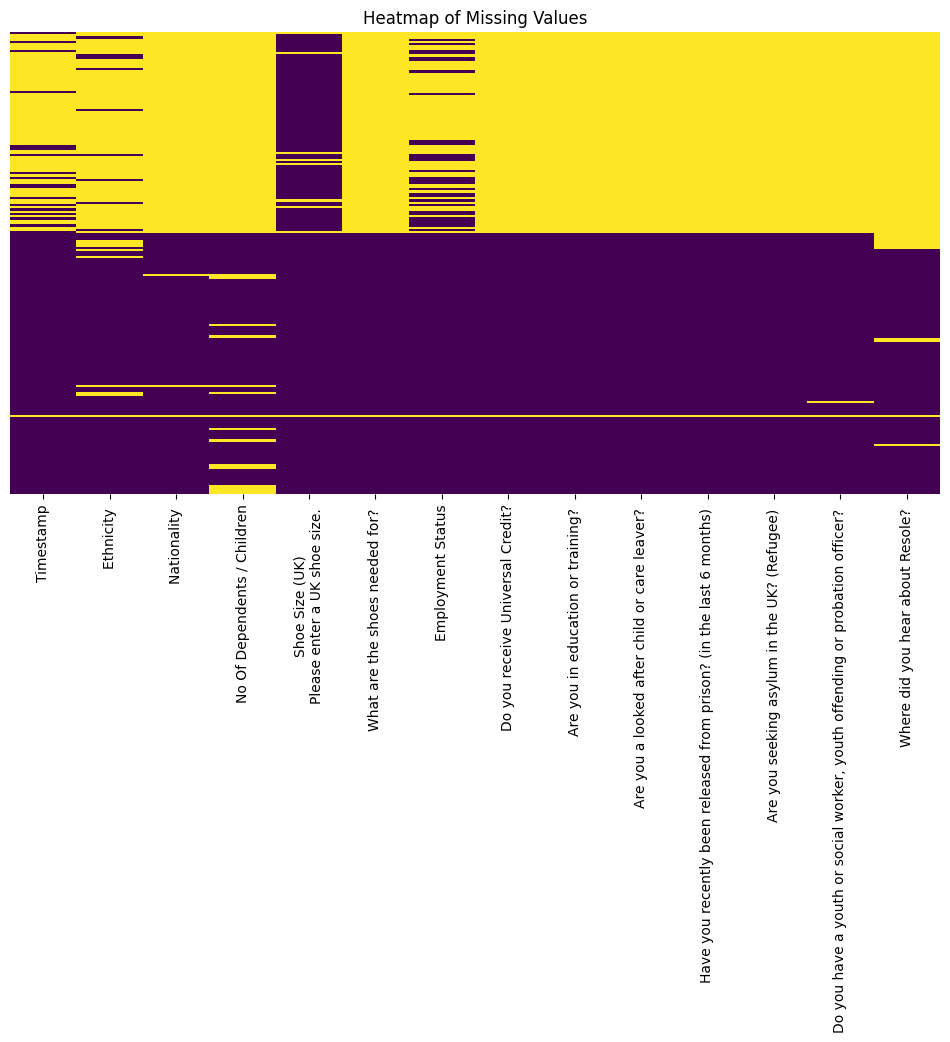

In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

print("Data types:\n", data.dtypes)


plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [ ]:
data = data.dropna(thresh=len(data.columns)-3)  # Drop rows with 3 or more missing values

In [ ]:
data.isna().sum()/len(data)*100

,0
Timestamp,0.000000
Ethnicity,7.017544
Nationality,1.754386
No Of Dependents / Children,12.280702
Shoe Size (UK) \nPlease enter a UK shoe size.,0.000000
What are the shoes needed for?,0.000000
Employment Status,0.000000
Do you receive Universal Credit?,0.000000
Are you in education or training?,0.000000
Are you a looked after child or care leaver?,0.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 14 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Timestamp                                                                     114 non-null    object
 1   Ethnicity                                                                     106 non-null    object
 2   Nationality                                                                   112 non-null    object
 3   No Of Dependents / Children                                                   100 non-null    object
 4   Shoe Size (UK) 
Please enter a UK shoe size.                                  114 non-null    object
 5   What are the shoes needed for?                                                114 non-null    object
 6   Employment Status                             

In [ ]:
print(data.columns)

Index(['Timestamp', 'Ethnicity ', 'Nationality ',
       'No Of Dependents / Children',
       'Shoe Size (UK) \nPlease enter a UK shoe size. ',
       'What are the shoes needed for? ', 'Employment Status',
       'Do you receive Universal Credit?',
       'Are you in education or training? ',
       'Are you a looked after child or care leaver? ',
       'Have you recently been released from prison? (in the last 6 months) ',
       'Are you seeking asylum in the UK? (Refugee) ',
       'Do you have a youth or social worker, youth offending or probation officer? ',
       'Where did you hear about Resole? '],
      dtype='object')


In [ ]:
new_column_names = [
    "timestamp",
    "ethnicity",
    "nationality",
    "No Of Dependents/Children",
    "uk_shoe_size",
    "shoe_purpose",
    "employment_status",
    "Do you receive Universal Credit?",
    "education/training",
    "looked_after_or_care_leaver",
    "recently_released_prison(in the last 6 months)",
    "seeking_asylum",
    "youth_support",
    "resole_source"
]
data.columns = new_column_names

data.to_csv("cleaned_data.csv", index=False)
print("Data loaded and columns renamed successfully!")

Data loaded and columns renamed successfully!


In [ ]:
print(data.columns)

Index(['timestamp', 'ethnicity', 'nationality', 'No Of Dependents/Children',
       'uk_shoe_size', 'shoe_purpose', 'employment_status',
       'Do you receive Universal Credit?', 'education/training',
       'looked_after_or_care_leaver',
       'recently_released_prison(in the last 6 months)', 'seeking_asylum',
       'youth_support', 'resole_source'],
      dtype='object')


In [ ]:
data.shape

(114, 14)

In [ ]:
data['Do you receive Universal Credit?'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['recently_released_prison(in the last 6 months)'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['education/training'].unique() #will have to manually encode or remove rows

array(['No', 'Yes', 'Asylum seeker ', 'asylum seeker',
       'Voluntary work in the charity sector ', 'Gym ',
       'Just started a CSC 4 week course.',
       'starting at West London College Hammersmith next week',
       'Finalising my foundation in music therapy for people with dementia. I can assist music therapists or do music freelancing work with seniors',
       'Not yet still waiting to do English ', 'Im on  the waiting list',
       'Im in the waiting list', 'Croydon College ', 'ESOL'], dtype=object)

In [ ]:
data['looked_after_or_care_leaver'].unique()

array(['No', 'Yes', 'Father ', 'Guardian ', 'young asylum seeker',
       'Yes by Hotel stuff'], dtype=object)

In [ ]:
data['seeking_asylum'].unique()

array(['Victim of trafficking/modern slavery (NRM) ', 'Yes', 'No',
       'Asylum seeker ', 'Refugee', 'I am seeking Assylum in the UK',
       'Refugee Status (5 years)'], dtype=object)

In [ ]:
data['youth_support'].unique()

array(['Advocacy worker', 'Advocate', 'No', 'Yes',
       'Support worker from Hestia Charity ', 'Outreach Advocate',
       'refuge support worker', 'Social Prescriber ', nan,
       'Outreach Advocate Hestia Modern Slavery Response Team',
       'Im in the Home Office hotel accommodation ', 'Yes, No'],
      dtype=object)

In [ ]:
data['youth_support'].value_counts()

In [ ]:
# Load the data
data = pd.read_csv("/content/cleaned_data.csv")

label_encoder = preprocessing.LabelEncoder()

data["Do you receive Universal Credit?"]= label_encoder.fit_transform(data["Do you receive Universal Credit?"])

data["recently_released_prison(in the last 6 months)"]= label_encoder.fit_transform(data["recently_released_prison(in the last 6 months)"])

data["education/training"] = data["education/training"].map({"No": 0 , "Yes": 1 , "Asylum seeker": 0 , "asylum seeker": 0 , "Voluntary work in the charity sector": 0 , "Gym": 0 , "Just started a CSC 4 week course": 1 , "starting at West London College Hammersmith next week": 1 , "Finalising my foundation in music therapy for people with dementia. I can assist music therapists or do music freelancing work with seniors": 1 , "Not yet still waiting to do English": 1 , "Im on  the waiting list": 0 , "Im in the waiting list": 0 , "Croydon College": 0 , "ESOL": 1}) #education = 0 #training = 1

data["looked_after_or_care_leaver"] = data["looked_after_or_care_leaver"].map({"No": 0 , "Yes": 1 , "Father": 0 , "Guardian": 0 , "young asylum seeker": 1 , "Yes by Hotel stuff":1})  # 1 yes i am, 0 no im not

data["seeking_asylum"] = data["seeking_asylum"].map({"Victim of trafficking/modern slavery (NRM)": 1 , "Yes": 1 , "No": 0 , "Asylum seeker": 1 , "Refugee": 0 , "I am seeking Assylum in the UK": 1 , "Refugee Status (5 years)": 0}) # 1 yes i am, 0 no im not

data["youth_support"] = data["youth_support"].map({"Advocacy worker": 0 , "Advocate": 0 , "No": 0 , "Yes": 1 , "Support worker from Hestia Charity": 0 , "Outreach Advocate": 0 , "refuge support worker": 0 , "Social Prescriber": 0 , "Outreach Advocate Hestia Modern Slavery Response Team": 0 , "Im in the Home Office hotel accommodation": 0 , "Yes, No": 0}) # 1 yes i am 0 no im not

output_file = "cleaned_data.csv"
data.to_csv(output_file, index=False)
print(f"Data saved as {output_file} after modifications.")

Data saved as cleaned_data.csv after modifications.


In [ ]:
data['Do you receive Universal Credit?'].unique()

array([1, 0])

In [ ]:
data['recently_released_prison(in the last 6 months)'].unique()

array([0, 1])

In [ ]:
data['education/training'].unique()

array([ 0.,  1., nan])

In [ ]:
data['looked_after_or_care_leaver'].unique()

array([ 0.,  1., nan])

In [ ]:
data['seeking_asylum'].unique()

array([nan,  1.,  0.])

In [ ]:
data['youth_support'].unique()

array([ 0.,  1., nan])

# Plotting the box plot for the avg_room_price column
plt.figure(figsize=(8, 6))
plt.boxplot(data['uk_shoe_size'].dropna(), vert=False)
plt.title('Box Plot of shoe size')
plt.xlabel('UK shoe size')
plt.show()